<a href="https://colab.research.google.com/github/quaaaaaet/LIFE_EXPENTANCY/blob/main/LIFE_EXPENTANCY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
# 시각화 관련
import matplotlib.pyplot as plt
import seaborn as sns
# score 관련,r2는 결정계수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
# 모델링 관련
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
import xgboost as xgb   
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor       
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
life = pd.read_csv('/content/drive/Shareddrives/멘토멘티/Life_Expectancy_Data.csv', encoding='utf-8')

In [4]:
life

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
life['Life expectancy '] #수치형데이터인지 확인

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

#상관계수

<AxesSubplot:>

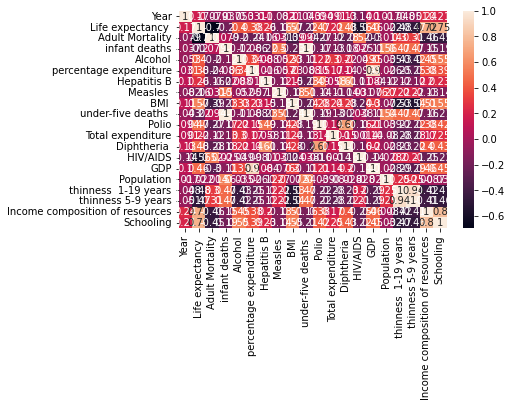

In [6]:
sns.heatmap(life.corr(), annot = True) #히트맵 특징공간 상관계수

In [7]:
life_pre=pd.read_csv('/content/drive/Shareddrives/멘토멘티/Life_Expectancy_Data_prepro.csv', encoding='utf-8')

<AxesSubplot:>

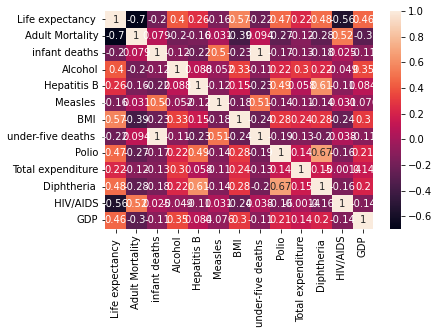

In [8]:
sns.heatmap(life_pre.corr(), annot = True) #히트맵 특징공간 상관계수, 필요없는 데이터 없앤 뒤

#기대수명 왜도 첨도

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


기대수명 -> Skewness: -0.638605, Kurtosis: -0.234477


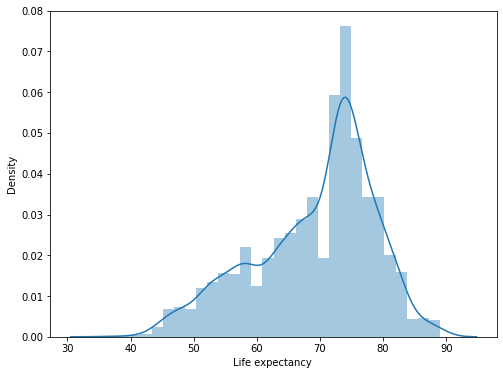

In [9]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(life_pre['Life expectancy '])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('기대수명',life_pre['Life expectancy '].skew(), life_pre['Life expectancy '].kurt()))

#알코올 왜도 첨도

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


알코올 -> Skewness: 0.589563, Kurtosis: -0.802909


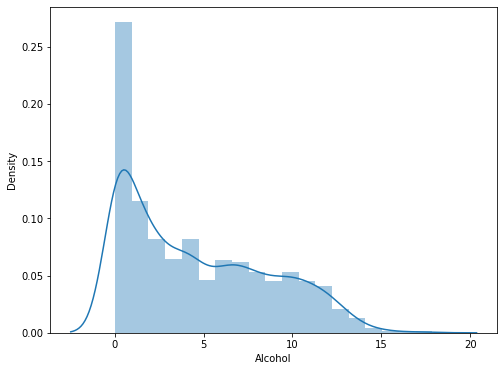

In [10]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(life_pre['Alcohol'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('알코올',life_pre['Alcohol'].skew(), life_pre['Alcohol'].kurt()))

#bmi 왜도 첨도

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


bmi -> Skewness: -0.219312, Kurtosis: -1.291095


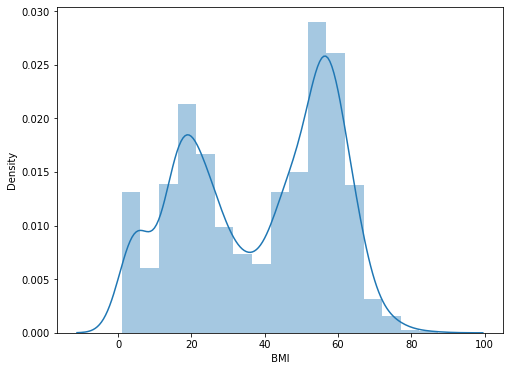

In [11]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(life_pre[' BMI '])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('bmi',life_pre[' BMI '].skew(), life_pre[' BMI '].kurt()))

#소아마비 왜도 첨도

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


소아마비 -> Skewness: -2.098053, Kurtosis: 3.776510


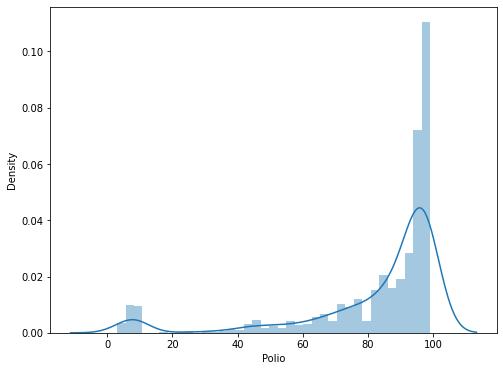

In [12]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(life_pre['Polio'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('소아마비',life_pre['Polio'].skew(), life_pre['Polio'].kurt()))

#Diphtheria	왜도 첨도

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Diphtheria -> Skewness: -2.072753, Kurtosis: 3.558143


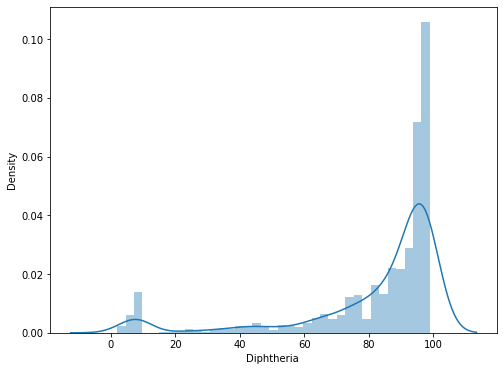

In [13]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(life_pre['Diphtheria '])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('Diphtheria',life_pre['Diphtheria '].skew(), life_pre['Diphtheria '].kurt()))

#GDP 왜도 첨도

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


GDP -> Skewness: 3.206655, Kurtosis: 12.333074


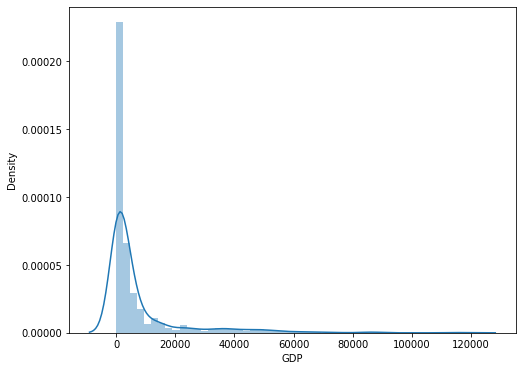

In [14]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(life_pre['GDP'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('GDP',life_pre['GDP'].skew(), life_pre['GDP'].kurt()))

In [15]:
life_pre.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP
0,Afghanistan,Developing,65.0,263.0,62,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210
1,Afghanistan,Developing,59.9,271.0,64,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514
2,Afghanistan,Developing,59.9,268.0,66,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976
3,Afghanistan,Developing,59.5,272.0,69,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000
4,Afghanistan,Developing,59.2,275.0,71,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231


In [16]:
life_pre['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [17]:
# status을 수치화 데이터로 바꾸어주는 과정
replace_name = {'Developing':1,'Developed':0}
life_pre.replace({'Status' : replace_name}, inplace = True)

In [18]:
life_pre['Status'].unique()

array([1, 0])

<AxesSubplot:>

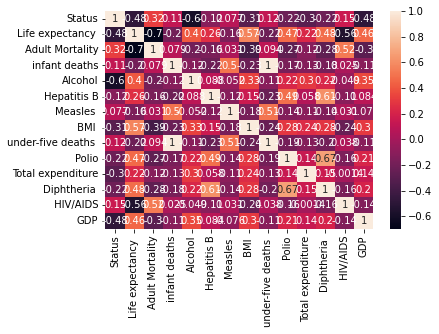

In [19]:
sns.heatmap(life_pre.corr(), annot = True) #히트맵 특징공간 상관계수

<AxesSubplot:xlabel='Alcohol', ylabel='Life expectancy '>

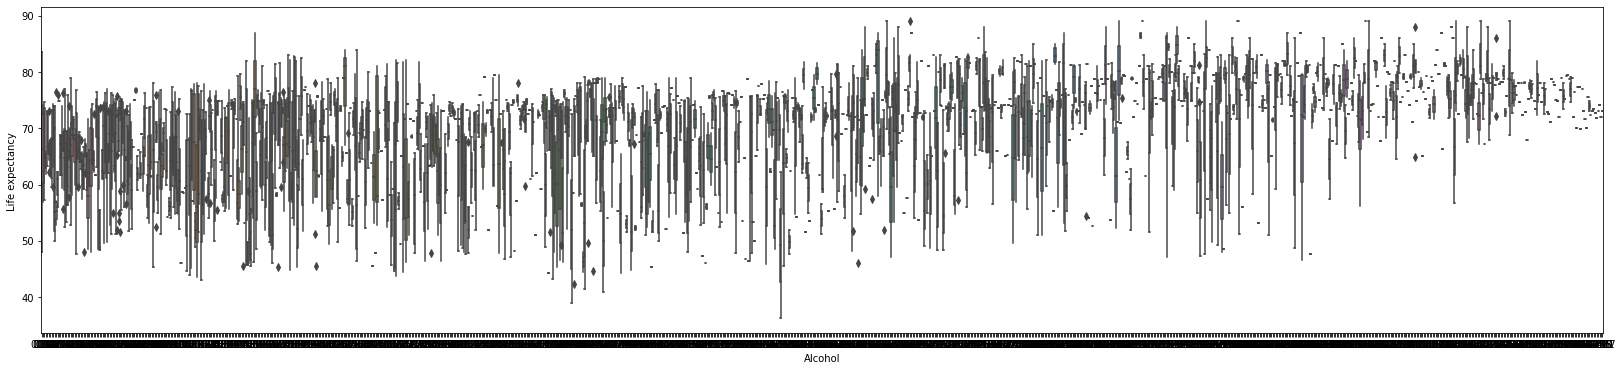

In [20]:
# 장르데이터 시각화
f, ax = plt.subplots(figsize = (28,6))
sns.boxplot(x='Alcohol', y='Life expectancy ', data=life_pre[['Alcohol', 'Life expectancy ']])

#최종 전처리 데이터 저장

In [21]:
life_pre.to_csv('/content/drive/MyDrive/life_final.csv', index = False,encoding='utf-8-sig')

In [22]:
final_life_pre = pd.read_csv('/content/drive/MyDrive/life_final.csv')

In [23]:
final_life_pre

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP
0,Afghanistan,1,65.0,263.0,62,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210
1,Afghanistan,1,59.9,271.0,64,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514
2,Afghanistan,1,59.9,268.0,66,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976
3,Afghanistan,1,59.5,272.0,69,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000
4,Afghanistan,1,59.2,275.0,71,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,1,44.3,723.0,27,4.36,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654
2934,Zimbabwe,1,44.5,715.0,26,4.06,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155
2935,Zimbabwe,1,44.8,73.0,25,4.43,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340
2936,Zimbabwe,1,45.3,686.0,25,1.72,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312


In [24]:
# 결측치 확인
final_life_pre.isna().sum() 

Country                 0
Status                  0
Life expectancy        10
Adult Mortality        10
infant deaths           0
Alcohol               194
Hepatitis B           553
Measles                 0
 BMI                   34
under-five deaths       0
Polio                  19
Total expenditure     226
Diphtheria             19
 HIV/AIDS               0
GDP                   448
dtype: int64

#결측지 제거

In [25]:
final_life_pre.columns

Index(['Country', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP'],
      dtype='object')

In [26]:
final_life_pre['Life expectancy '].fillna(0, inplace = True)
final_life_pre['Adult Mortality'].fillna(0, inplace = True)
final_life_pre['Alcohol'].fillna(0, inplace = True)
final_life_pre['Hepatitis B'].fillna(0, inplace = True)
final_life_pre[' BMI '].fillna(0, inplace = True)
final_life_pre['Polio'].fillna(0, inplace = True)
final_life_pre['Total expenditure'].fillna(0, inplace = True)
final_life_pre['Diphtheria '].fillna(0, inplace = True)
final_life_pre['GDP'].fillna(0, inplace = True)


In [27]:
# 결측치 확인
final_life_pre.isna().sum() 

Country               0
Status                0
Life expectancy       0
Adult Mortality       0
infant deaths         0
Alcohol               0
Hepatitis B           0
Measles               0
 BMI                  0
under-five deaths     0
Polio                 0
Total expenditure     0
Diphtheria            0
 HIV/AIDS             0
GDP                   0
dtype: int64

In [28]:
final_life_pre.describe()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,0.825732,68.989312,164.235534,30.303948,4.298928,65.705582,2419.592240,37.877774,42.035739,82.016338,5.481406,81.791695,1.742103,6342.091419
std,0.379405,10.327437,124.451093,117.926501,4.079748,38.878316,11467.272489,20.344920,160.445548,24.271835,2.875063,24.544100,5.077785,13409.501883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,1.000000,63.000000,73.000000,0.000000,0.470000,24.000000,0.000000,19.000000,0.000000,77.000000,3.740000,78.000000,0.100000,190.174435
50%,1.000000,72.000000,144.000000,3.000000,3.130000,87.000000,17.000000,43.000000,4.000000,93.000000,5.540000,93.000000,0.100000,1171.983435
75%,1.000000,75.600000,227.000000,22.000000,7.390000,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190
max,1.000000,89.000000,723.000000,1800.000000,17.870000,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800


# train 데이터와 test 데이터로 분리 (train 80%, test 20% ,랜덤 샘플링)

In [29]:
# shuffle = True
life_expect_train, life_expect_test= train_test_split(final_life_pre,test_size=0.2,shuffle=True,random_state=1004)

In [30]:
life_expect_train.shape

(2350, 15)

In [31]:
life_expect_test.shape

(588, 15)

In [32]:
life_expect_train.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP
1893,Nigeria,1,54.5,344.0,483,0.00,49.0,12423,25.4,747,49.0,0.00,49.0,3.7,2655.157977
1172,Iceland,0,82.4,5.0,0,7.31,0.0,0,6.2,0,91.0,8.75,91.0,0.1,4781.388800
2832,Uzbekistan,1,68.0,183.0,21,2.56,98.0,0,4.0,24,99.0,6.31,98.0,0.2,1213.265328
1072,Guatemala,1,68.4,211.0,16,2.53,0.0,0,41.1,20,78.0,6.76,77.0,0.3,1568.376276
982,Georgia,1,73.9,127.0,1,8.14,89.0,64,52.8,1,88.0,9.38,94.0,0.1,3725.632210


In [33]:
life_expect_test.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP
2503,Swaziland,1,47.1,568.0,3,6.72,86.0,49,26.3,4,87.0,5.11,84.0,48.8,1437.634951
2761,United Arab Emirates,1,74.2,17.0,1,1.64,92.0,69,54.1,1,94.0,2.38,94.0,0.1,3371.268690
1894,Nigeria,1,53.6,362.0,490,0.01,49.0,6855,24.7,759,49.0,3.67,49.0,3.9,3221.678128
1069,Guatemala,1,69.6,21.0,15,2.40,0.0,0,43.1,18,88.0,6.77,87.0,0.4,1872.737830
862,Eritrea,1,58.8,343.0,7,0.56,91.0,376,13.3,10,95.0,3.50,93.0,1.9,232.794546


In [34]:
show_expect_test = life_expect_test[['Country','Life expectancy ']]



In [35]:
show_expect_test

,Country,Life expectancy
2503,Swaziland,47.1
2761,United Arab Emirates,74.2
1894,Nigeria,53.6
1069,Guatemala,69.6
862,Eritrea,58.8
...,...,...
1038,Greece,79.1
1975,Papua New Guinea,62.9
1883,Niger,57.1
2494,Swaziland,53.6


In [36]:
show_expect_test.to_csv('/content/drive/MyDrive/show_expect_test.csv', index = False, encoding='utf-8-sig')


<AxesSubplot:>

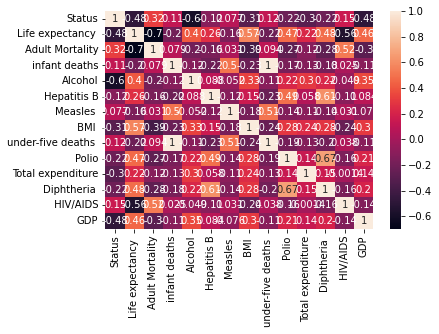

In [37]:
sns.heatmap(life_pre.corr(), annot = True) #히트맵 특징공간 상관계수, 필요없는 데이터 없앤 뒤

# 모델링 
(특징공간 : 알코올(성인15세이상 알코올 소비량), 체질량 지수, 소아마비, 디스테리아, gdp, 
범주형자료(개도국유무 : 개도국 1, 선진국 0)
예측하는 값 : 기대수명)

LinearRegression

lightgbm

XGBOOST

RandomForest


In [38]:
model_linear = LinearRegression()
model_lgbm = lgb.LGBMRegressor(random_state=777, n_estimators=1000)
model_xgb = xgb.XGBRegressor(random_state=777, n_estimators=1000)
model_rf = RandomForestRegressor(random_state=777, n_estimators=1000)

In [39]:
# 특징공간 설정
features = ['Status', 'Alcohol', ' BMI ', 'GDP','Diphtheria ']
target = ['Life expectancy ']

In [40]:
x_train, x_test, y_train =life_expect_train[features], life_expect_test[features], life_expect_train[target]

In [41]:
# 모델링#fit은 훈련시키는 함수
model_linear.fit(x_train, y_train) # // LinerRegression
model_lgbm.fit(x_train, y_train)   # // Lightgbm
model_xgb.fit(x_train, y_train)     # // XGB
model_rf.fit(x_train, y_train)     # // RandomForest

<ipython-input-41-d4bdabf8a4f3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train, y_train)     # // RandomForest


RandomForestRegressor(n_estimators=1000, random_state=777)

#예측 결과 보기

In [42]:
show_test=pd.read_csv('/content/drive/Shareddrives/멘토멘티/show_expect_real_test.csv')

In [43]:
show_test

,Country,Life expectancy
0,Swaziland,0
1,United Arab Emirates,0
2,Nigeria,0
3,Guatemala,0
4,Eritrea,0
...,...,...
583,Greece,0
584,Papua New Guinea,0
585,Niger,0
586,Swaziland,0


In [44]:
singleLR = show_test.copy()
singleLGBM = show_test.copy()
singleXGB = show_test.copy()
singleRF = show_test.copy()


In [45]:
singleLR['Life expectancy '] = model_linear.predict(x_test)
singleLGBM['Life expectancy '] = model_lgbm.predict(x_test)
singleXGB['Life expectancy '] = model_xgb.predict(x_test)
singleRF['Life expectancy '] = model_rf.predict(x_test)


In [46]:
singleLR

,Country,Life expectancy
0,Swaziland,66.199082
1,United Arab Emirates,71.402404
2,Nigeria,61.637066
3,Guatemala,68.785602
4,Eritrea,64.363115
...,...,...
583,Greece,74.959008
584,Papua New Guinea,67.619677
585,Niger,62.472630
586,Swaziland,66.963376


In [47]:
singleLGBM

,Country,Life expectancy
0,Swaziland,55.098236
1,United Arab Emirates,71.300228
2,Nigeria,59.888916
3,Guatemala,69.127240
4,Eritrea,63.580367
...,...,...
583,Greece,77.800338
584,Papua New Guinea,65.843064
585,Niger,57.831210
586,Swaziland,55.410006


In [48]:
singleXGB

,Country,Life expectancy
0,Swaziland,55.040825
1,United Arab Emirates,70.957283
2,Nigeria,59.778038
3,Guatemala,70.414429
4,Eritrea,62.519112
...,...,...
583,Greece,79.604340
584,Papua New Guinea,68.284210
585,Niger,58.964069
586,Swaziland,58.779507


In [49]:
singleRF

,Country,Life expectancy
0,Swaziland,52.0852
1,United Arab Emirates,72.3983
2,Nigeria,60.0415
3,Guatemala,69.6519
4,Eritrea,68.7490
...,...,...
583,Greece,76.8594
584,Papua New Guinea,66.0145
585,Niger,64.0379
586,Swaziland,56.3883


# 모델들의 mse rmse 결정계수

In [50]:
# 모델들의 mse rmse 결정계수

#LinerRegression
print("LinerRegression")
print('LinerRegression 모델의 Mean_Squared_Error = ', mean_squared_error(life_expect_test['Life expectancy '], singleLR['Life expectancy ']))
print('LinerRegression 모델의 RMSE = ',  mean_squared_error(life_expect_test['Life expectancy '], singleLR['Life expectancy '])**0.5)
print("LinerRegression 모델의 결정계수 =",r2_score(life_expect_test['Life expectancy '], singleLR['Life expectancy ']))
print("")
#Lightgbm
print("Lightgbm")
print('Lightgbm 모델의 Mean_Squared_Error = ', mean_squared_error(life_expect_test['Life expectancy '], singleLGBM['Life expectancy ']))
print('Lightgbm 모델의 RMSE = ',  mean_squared_error(life_expect_test['Life expectancy '], singleLGBM['Life expectancy '])**0.5)
print("Lightgbm 모델의 결정계수 =" ,r2_score(life_expect_test['Life expectancy '], singleLGBM['Life expectancy ']))
print("")
#XGB
print("XGB")
print('XGB 모델의 Mean_Squared_Error = ', mean_squared_error(life_expect_test['Life expectancy '], singleXGB['Life expectancy ']))
print('XGB 모델의 RMSE = ',  mean_squared_error(life_expect_test['Life expectancy '], singleXGB['Life expectancy '])**0.5)
print("XGB 모델의 결정계수 =", r2_score(life_expect_test['Life expectancy '], singleXGB['Life expectancy ']))
print("")
#RandomForest
print("RandomForest")
print('RandomForest 모델의 Mean_Squared_Error = ', mean_squared_error(life_expect_test['Life expectancy '], singleRF['Life expectancy ']))
print('RandomForest 모델의 RMSE = ',  mean_squared_error(life_expect_test['Life expectancy '], singleRF['Life expectancy '])**0.5)
print("RandomForest 모델의 결정계수 = ",r2_score(life_expect_test['Life expectancy '], singleRF['Life expectancy ']))
print("")

LinerRegression
LinerRegression 모델의 Mean_Squared_Error =  59.44235376122046
LinerRegression 모델의 RMSE =  7.709886754111273
LinerRegression 모델의 결정계수 = 0.46040727944190174

Lightgbm
Lightgbm 모델의 Mean_Squared_Error =  35.55360983484721
Lightgbm 모델의 RMSE =  5.9626847841259565
Lightgbm 모델의 결정계수 = 0.6772592630919319

XGB
XGB 모델의 Mean_Squared_Error =  29.877119900172215
XGB 모델의 RMSE =  5.465996697782776
XGB 모델의 결정계수 = 0.7287880544883151

RandomForest
RandomForest 모델의 Mean_Squared_Error =  27.89143414337072
RandomForest 모델의 RMSE =  5.281234149644448
RandomForest 모델의 결정계수 =  0.7468132757638728



# XGBoostRegressor + BayesianOptimization

In [51]:
# 하이퍼 파라미터 범위

pbounds = { 'learning_rate': (0.0001, 0.4),
            'n_estimators': (10, 1000),
            'max_depth': (3,10),   
            'subsample': (0.5, 1),  
            'colsample_bytree': (0.5, 1),   
            'gamma': (0, 5)}

def xgb_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, gamma):
    
    params = {
        'learning_rate': learning_rate,                      # 학습률
        'n_estimators' : int(round(n_estimators)),           # 생성할 tree의 갯수
        'max_depth' : int(round(max_depth)),                 # 최대 깊이
        'subsample': subsample,                              # 각 트리마다의 관측 데이터 샘플링 비율
        'colsample': colsample_bytree,                       # 각 트리마다의 feature 샘플링 비율
        'gamma': gamma,                                      # 분할을 수행하는데 필요한 최소 손실 감소
        'n_jobs' : -1,                                       # 사용할 cpu 갯수( -1 있는거 다 사용)
        'random_state' : 777                                 # 랜덤 샘플링시 고정할 시드 값
    }
    
    m_xgb = xgb.XGBRegressor(**params)
    
    kf = KFold(n_splits = 5 , shuffle=True, random_state=50)

    score = cross_val_score(m_xgb, x_train, y_train, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
    
    return np.mean(score)

BO_xgb = BayesianOptimization(f = xgb_opt, pbounds = pbounds, random_state=0)

In [52]:
BO_xgb.maximize(init_points = 10, n_iter = 100)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | -28.16    | 0.7744    | 3.576     | 0.2411    | 6.814     | 429.4     | 0.8229    |
| 2         | -30.68    | 0.7188    | 4.459     | 0.3855    | 5.684     | 793.8     | 0.7644    |
| 3         | -884.4    | 0.784     | 4.628     | 0.02851   | 3.61      | 30.02     | 0.9163    |
| 4         | -30.51    | 0.8891    | 4.35      | 0.3914    | 8.594     | 466.9     | 0.8903    |
| 5         | -25.97    | 0.5591    | 3.2       | 0.05743   | 9.613     | 526.6     | 0.7073    |
| 6         | -31.0     | 0.6323    | 3.871     | 0.1825    | 6.979     | 28.6      | 0.8088    |
| 7         | -31.0     | 0.806     | 3.085     | 0.3775    | 7.773     | 365.9     | 0.7185    |
| 8         | -27.98    | 0.8488    | 0.3011    | 0.2667    | 7.694     | 218.3     | 0.5645    |
| 9         | -28.63

In [53]:
BO_xgb.max

{'target': -25.96529117187571,
 'params': {'colsample_bytree': 0.5591372129344666,
  'gamma': 3.199605106637619,
  'learning_rate': 0.05742697963487767,
  'max_depth': 9.612682419347088,
  'n_estimators': 526.629838532571,
  'subsample': 0.7073309699952618}}

In [54]:
params = BO_xgb.max['params']
params['max_depth'] = int(round(params['max_depth']))
params['n_estimators'] = int(round(params['n_estimators']))

In [55]:
final_xgb=xgb.XGBRegressor(random_state = 777, **params)
final_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5591372129344666, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=3.199605106637619, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05742697963487767, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=527, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=777, ...)

In [56]:
finalxgb = show_test.copy()
finalxgb['Life expectancy '] = final_xgb.predict(x_test)

In [57]:
print('파라미터 조정후 XGB 모델의 Mean_Squared_Error = ', mean_squared_error(life_expect_test['Life expectancy '], finalxgb['Life expectancy ']))
print('파라미터 조정후 XGB 모델의 RMSE = ',  mean_squared_error(life_expect_test['Life expectancy '], finalxgb['Life expectancy '])**0.5)
print("파라미터 조정후 XGB 모델의 결정계수 =", r2_score(life_expect_test['Life expectancy '], finalxgb['Life expectancy ']))

파라미터 조정후 XGB 모델의 Mean_Squared_Error =  36.601131400137376
파라미터 조정후 XGB 모델의 RMSE =  6.04988689151602
파라미터 조정후 XGB 모델의 결정계수 = 0.667750302300629


# LGBMRegressor + BayesianOptimization

In [58]:
pbounds = { 'learning_rate': (0.0005, 0.2),
            'n_estimators': (10, 1000),
            'max_depth': (3,10),   
            'subsample': (0.5,1), 
            'colsample_bytree': (0.5,1),   
            'num_leaves': (2,16),
            'min_child_weight': (1, 10)}


def lgbm_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, num_leaves, min_child_weight):

    params = {
        'learning_rate': learning_rate,               # 학습률
        'n_estimators' : int(round(n_estimators)),    # 생성할 tree의 갯수
        'max_depth' : int(round(max_depth)),          # 최대 깊이
        'subsample': subsample,                       # 각 트리마다의 관측 데이터 샘플링 비율
        'colsample_bytree' : colsample_bytree,        # 각 트리마다의 feature 샘플링 비율
        'num_leaves' : int(round(num_leaves)),        # 노드의 개수
        'min_child_weight' : min_child_weight,        # child의 관측에서 요구되는 최소 가중치의 합
        'n_jobs' : -1                                 # cpu 사용 개수 (-1 이면 있는거 다 사용)
    }
    
    m_lgb = lgb.LGBMRegressor(**params)
    
    kf = KFold(n_splits=5 , shuffle=True, random_state=50)

    score = cross_val_score(m_lgb, x_train, y_train, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
    
    return np.mean(score)

BO_lgbm = BayesianOptimization(f = lgbm_opt, pbounds = pbounds, random_state=1)  

In [59]:
BO_lgbm.maximize(init_points=10, n_iter = 100)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | -40.55    | 0.7085    | 0.1442    | 3.001     | 3.721     | 155.3     | 3.293     | 0.5931    |
| 2         | -37.09    | 0.6728    | 0.07966   | 6.772     | 4.773     | 688.4     | 4.862     | 0.9391    |
| 3         | -38.99    | 0.5137    | 0.1343    | 5.921     | 6.028     | 149.0     | 4.773     | 0.9004    |
| 4         | -38.84    | 0.9841    | 0.06303   | 7.846     | 8.888     | 895.7     | 3.191     | 0.5195    |
| 5         | -38.13    | 0.5849    | 0.1757    | 3.688     | 4.79      | 958.3     | 9.464     | 0.8459    |
| 6         | -33.89    | 0.6578    | 0.1375    | 8.842     | 1.165     | 752.6     | 15.84     | 0.8741    |
| 7         | -36.46    | 0.6402    | 0.158     | 3.723     | 5.031     | 909.5     | 6.111     | 0.6439    |
| 8       

In [60]:
BO_lgbm.max

{'target': -32.446205973920684,
 'params': {'colsample_bytree': 1.0,
  'learning_rate': 0.13016169049079573,
  'max_depth': 10.0,
  'min_child_weight': 9.375976494487535,
  'n_estimators': 753.0291692079346,
  'num_leaves': 15.52207501839507,
  'subsample': 0.5629570300951867}}

In [61]:
params = BO_lgbm.max['params']
params['max_depth'] = int(round(params['max_depth']))
params['n_estimators'] = int(round(params['n_estimators']))
params['num_leaves'] = int(round(params['num_leaves']))

In [62]:
final_lgb=lgb.LGBMRegressor(random_state=777, **params)
final_lgb.fit(x_train, y_train)
finallgb = show_test.copy()
finallgb['Life expectancy '] = final_lgb.predict(x_test)

In [63]:
print('파라미터 조정후 lgb 모델의 Mean_Squared_Error = ', mean_squared_error(life_expect_test['Life expectancy '], finallgb['Life expectancy ']))
print('파라미터 조정후 lgb 모델의 RMSE = ',  mean_squared_error(life_expect_test['Life expectancy '], finallgb['Life expectancy '])**0.5)
print("파라미터 조정후 lgb 모델의 결정계수 =", r2_score(life_expect_test['Life expectancy '], finallgb['Life expectancy ']))

파라미터 조정후 lgb 모델의 Mean_Squared_Error =  34.734250077182814
파라미터 조정후 lgb 모델의 RMSE =  5.893577018855596
파라미터 조정후 lgb 모델의 결정계수 = 0.6846970668257805


#  GradientBoostingRegressor + BayesianOptimization

In [64]:
pbounds = { 'learning_rate': (0.0005, 0.2),
            'n_estimators': (10, 500),
            'max_depth': (3,10),   
            'subsample': (0.5,1), 
            'min_samples_split': (2,5),   
            'min_samples_leaf': (1,5)}

def gbm_opt(learning_rate, n_estimators, max_depth, subsample, min_samples_split, min_samples_leaf):

    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'min_samples_split' : int(round(min_samples_split)),
        'min_samples_leaf' : int(round(min_samples_leaf))
    }
    
    gbm = GradientBoostingRegressor(**params)
    kf = KFold(n_splits = 5 , shuffle = True, random_state=50)
    score = cross_val_score(gbm, x_train, y_train, scoring='neg_mean_squared_error', cv = kf, n_jobs=-1)
    return np.mean(score)

BO_gbm = BayesianOptimization(f = gbm_opt, pbounds = pbounds, random_state=0)    

In [ ]:
BO_gbm.maximize(init_points = 10, n_iter = 200)

|   iter    |  target   | learni... | max_depth | min_sa... | min_sa... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | -26.82    | 0.11      | 8.006     | 3.411     | 3.635     | 217.6     | 0.8229    |
| 2         | -26.57    | 0.0878    | 9.242     | 4.855     | 3.15      | 397.9     | 0.7644    |
| 3         | -31.47    | 0.1138    | 9.479     | 1.284     | 2.261     | 19.91     | 0.9163    |
| 4         | -26.68    | 0.1557    | 9.09      | 4.914     | 4.397     | 236.1     | 0.8903    |
| 5         | -27.17    | 0.0241    | 7.479     | 1.573     | 4.834     | 265.7     | 0.7073    |
| 6         | -40.59    | 0.05328   | 8.42      | 2.825     | 3.705     | 19.21     | 0.8088    |
| 7         | -26.68    | 0.1226    | 7.319     | 4.775     | 4.045     | 186.2     | 0.7185    |
| 8         | -32.27    | 0.1397    | 3.422     | 3.667     | 4.012     | 113.1     | 0.5645    |
| 9         | -26.13

In [ ]:
BO_gbm.max

In [ ]:
params = BO_gbm.max['params']
params['max_depth'] = int(round(params['max_depth']))
params['n_estimators'] = int(round(params['n_estimators']))
params['min_samples_leaf'] = int(round(params['min_samples_leaf']))
params['min_samples_split'] = int(round(params['min_samples_split']))

In [ ]:
gbm = GradientBoostingRegressor(random_state = 777, **params)
gbm.fit(x_train, y_train)
finalgbm = show_test.copy()
finalgbm['Life expectancy '] = gbm.predict(x_test)

In [ ]:
print('파라미터 조정후 lgb 모델의 Mean_Squared_Error = ', mean_squared_error(life_expect_test['Life expectancy '], finalgbm['Life expectancy ']))
print('파라미터 조정후 lgb 모델의 RMSE = ',  mean_squared_error(life_expect_test['Life expectancy '], finalgbm['Life expectancy '])**0.5)
print("파라미터 조정후 lgb 모델의 결정계수 =", r2_score(life_expect_test['Life expectancy '], finalgbm['Life expectancy ']))

In [ ]:
finalgbm

In [ ]:
print(gbm)
print(final_lgb)
print(final_xgb)
print(model_rf)

In [ ]:
final_model= show_test.copy()

In [ ]:
final_model['num_off_box']=(gbm.predict(x_test)+final_lgb.predict(x_test)+final_xgb.predict(x_test)+model_rf.predict(x_test))/4

In [ ]:
final_model.info()

In [ ]:
print('최종 모델의 Mean_Squared_Error = ', mean_squared_error(life_expect_test['Life expectancy '], life_expect_test['Life expectancy ']))
print('최종 모델의 RMSE = ',  mean_squared_error(life_expect_test['Life expectancy '], life_expect_test['Life expectancy '])**0.5)
print("최종 모델의 결정계수 =", r2_score(life_expect_test['Life expectancy '], life_expect_test['Life expectancy ']))

In [ ]:
final_model